#### Reading IRIS data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [25]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]  # Features
y=df['variety']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# 1 Classification with 100 small decision trees

In [26]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [27]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


#### prediction for a single data-point from test dataset

In [28]:
# Predict what flower/plant belongs to, if the following X's are known:
# sepal length = 3
# sepal width = 5
# petal length = 4
# petal width = 2

In [29]:
clf.predict([[3, 5, 4, 2]])

array(['Virginica'], dtype=object)

#### Finding Important Features in Scikit-learn

In [30]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
feature_imp = pd.Series(clf.feature_importances_,index=list(df.columns.values[0:4])).sort_values(ascending=False)
feature_imp

petal.width     0.448747
petal.length    0.414565
sepal.length    0.107208
sepal.width     0.029481
dtype: float64

No handles with labels found to put in legend.


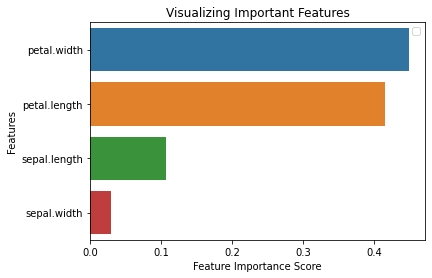

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# 2 Refining the Model


 #### Generating the Model on Selected (most important) Features

In [33]:
# Here, you can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [34]:
# Split dataset into features and labels
X=df[['petal.length', 'petal.width','sepal.length']]  # Removed feature "sepal.width"
y=df['variety']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [35]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


In [ ]:
# References
# https://www.datacamp.com/community/tutorials/random-forests-classifier-python